<a href="https://colab.research.google.com/github/vitorgaboardi/data-science/blob/master/EuroRoad_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto de Análise de Redes - Rodovias da Europa

Base de dados disponível em: https://networks.skewed.de/net/euroroad

# 1.0 - Processando uma base de dados e salvando um arquivo graphml

Importando as bibliotecas necessárias

In [153]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import pandas as pd

Inicialmente, vamos carregar os arquivos csv como Dataframes no pandas

In [154]:
edges = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")

In [155]:
edges = edges.rename(columns={"# source": "source",' target':'target'})
edges.head()

,source,target
0,0,1
1,1,2
2,1,16
3,2,3
4,3,4


In [156]:
nodes = nodes.rename(columns={"# index": "index",' meta': 'meta',' _pos':'pos'})
nodes.head()

,index,meta,pos
0,0,Greenock,"array([1.69563397, 2.90766292])"
1,1,Glasgow,"array([1.73869647, 2.89200537])"
2,2,Preston,"array([1.71884408, 2.8463844 ])"
3,3,Birmingham,"array([1.71876562, 2.79931827])"
4,4,Southampton,"array([1.68482611, 2.77194074])"


Formatar o Dataframe para inserir os nomes das cidades ao invés dos IDs

In [157]:
# criar um dicionário que relaciona os indices com as cidades
cities_dict = dict(zip(nodes.index, nodes.meta))

# mapear os nós conforme o dicionário
edges['source'] = edges['source'].map(cities_dict)
edges['target'] = edges['target'].map(cities_dict)

edges.head()

,source,target
0,Greenock,Glasgow
1,Glasgow,Preston
2,Glasgow,Edinburgh
3,Preston,Birmingham
4,Birmingham,Southampton


Criar o grafo a partir do DataFrame do pandas

In [158]:
G = nx.Graph()
G = nx.from_pandas_edgelist(edges, 'source', 'target')
print(G.nodes())
print(nx.number_of_nodes(G))

['Greenock', 'Glasgow', 'Preston', 'Edinburgh', 'Birmingham', 'Southampton', 'Cambridge', 'Le Havre', 'Paris', 'Amiens', 'Orléans', 'Calais', 'Lyon', 'Brussels', 'Le Mans', 'Reims', 'Chaumont', 'Bordeaux', 'Tours', 'Montargis', 'Toulouse', 'San Sebastián', 'Clermont-Ferrand', 'Angoulême', 'Burgos', 'Bilbao', 'Madrid', 'Valladolid', 'Seville', 'Barcelona', 'Valencia', 'Lisbon', 'Algeciras', 'Huelva', 'Mérida', 'Málaga', 'Inverness', 'Perth', 'Newcastle', 'London', 'Carlisle', 'Folkestone', 'Bristol', 'Colchester', 'Northampton', 'Dover', 'Bruges', 'Rouen', 'Orange', 'Chambéry', "Pont-d'Ain", 'Grenoble', 'Narbonne', 'Marseille', 'Girona', 'Tarragona', 'Castellón de la Plana', 'Alicante', 'Murcia', 'Almería', 'Granada', 'Hook of Holland', 'Rotterdam', 'The Hague', 'Eindhoven', 'Ludwigshafen', 'Maastricht', 'Antwerp', 'Venlo', 'Breda', 'Liège', 'Bastogne', 'Leuven', 'Eupen', 'Namur', 'St. Vith', 'Charleville-Mézières', 'Arlon', 'Luxembourg', 'Metz', 'Trier', 'Saint-Avold', 'Lausanne', 'Gen

Inserir o atributo da localização de cada nó (que representa cada cidade)

In [162]:
#colocar o código para colocar o atributo aqui!
G.nodes["London"]

{'x': -3775.90594, 'y': -5788.733340000001}

In [161]:
# criar os vetores x, y de float em função da coluna pos (que é uma string)
pos_string = [s[7:-2].split(', ') for s in nodes.pos.tolist()]
x = [float(s[0])*-2000 for s in pos_string] 
y = [float(s[1])*-2000 for s in pos_string]

# criação dos dicionários que relacionam as cidades com as posições x e y
cities_pos_x = dict(zip(nodes.meta, x))
cities_pos_y = dict(zip(nodes.meta, y))
print(cities_pos_x)
print(cities_pos_y)

# adicionando as posições como atributos dos nós do grafo
nx.set_node_attributes(G, cities_pos_x, "x")
nx.set_node_attributes(G, cities_pos_y, "y")


{'Greenock': -3391.26794, 'Glasgow': -3477.39294, 'Preston': -3437.68816, 'Birmingham': -3437.5312400000003, 'Southampton': -3369.65222, 'Le Havre': -5406.590099999999, 'Paris': -5441.32, 'Orléans': -5526.94444, 'Bordeaux': -5538.011960000001, 'San Sebastián': -5586.24166, 'Burgos': -5508.3943, 'Madrid': -5408.00318, 'Seville': -5256.28242, 'Algeciras': -5107.66412, 'Inverness': -3458.50522, 'Perth': -3518.25642, 'Edinburgh': -3577.7774600000002, 'Newcastle': -3708.72526, 'London': -3775.90594, 'Folkestone': -3846.7561199999996, 'Dover': -3906.23554, 'Calais': -5301.77988, 'Lyon': -5604.74002, 'Orange': -5698.96082, 'Narbonne': -5714.11934, 'Girona': -5645.41056, 'Barcelona': -5532.75062, 'Tarragona': -5421.4833, 'Castellón de la Plana': -5328.305600000001, 'Valencia': -5272.29478, 'Alicante': -5139.8261600000005, 'Murcia': -5028.9859400000005, 'Almería': -4957.12746, 'Málaga': -4975.6465800000005, 'Hook of Holland': -4552.8429399999995, 'Rotterdam': -4679.912179999999, 'Eindhoven': -4

Exportar o grafo criado em um arquivo para ser lido no Gephi.

In [145]:
nx.write_graphml(G, "euroroad.graphml")

# 2.0 - Calculando algumas métricas

Inicialmente, calculando o grau do nó "Moscow" (maior de todos)

In [172]:
ego = "London"

alters_1 = G[ego]
nx.degree(G,ego)

5

Calcular o valor do *clustering* do nosso grafo.

In [176]:
acc = nx.average_clustering(G)
acc

0.016731564857629593

Computando o histograma que relaciona o coeficiente de clustering com a frequência.

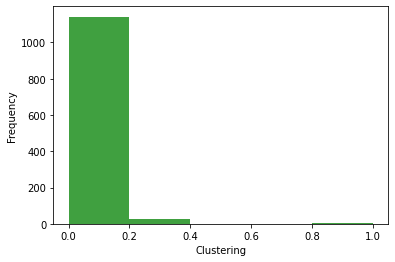

In [180]:
cc_values = nx.clustering(nx.Graph(G)).values()
plot = plt.hist(cc_values, 5, facecolor='green', alpha=0.75)
plt.xlabel('Clustering')
plt.ylabel('Frequency')
plt.show()

Degree vs Clustering scatter plot

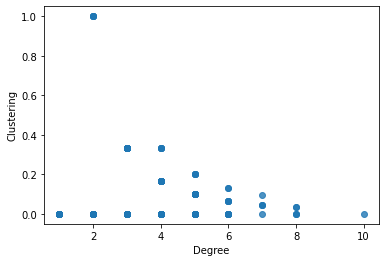

In [181]:
x = [val for (node, val) in G.degree()]
y = nx.clustering(nx.Graph(G)).values()

plot = plt.scatter(x, y, alpha=0.8)
plt.xlabel('Degree')
plt.ylabel('Clustering')
plt.show()
